## <center>Loading libraries<center>

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go 

import os
import requests
import csv

### Loading and reading of the dataset conversion to data frame.

In [46]:
# Import csv.
df = pd.read_csv(os.path.join(os.getcwd(), 'titanic.csv'))

# Data frame reading.
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [47]:
# Taking a general look.
print (df.info())
print ('-------------------------------------')
shape = df.shape
print (f'This data frame has {shape[0]} rows y {shape[1]} colums.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
-------------------------------------
This data frame has 891 rows y 12 colums.


## <center>Data cleaning<center>

In [48]:
# Total data in each column.
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [49]:
# Finding the total of nulls values in each column.
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [50]:
# Percentage of nulls in each column.
nullPercentage = (df.isnull().sum() / df.shape[0]) * 100
print (nullPercentage)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


<Axes: >

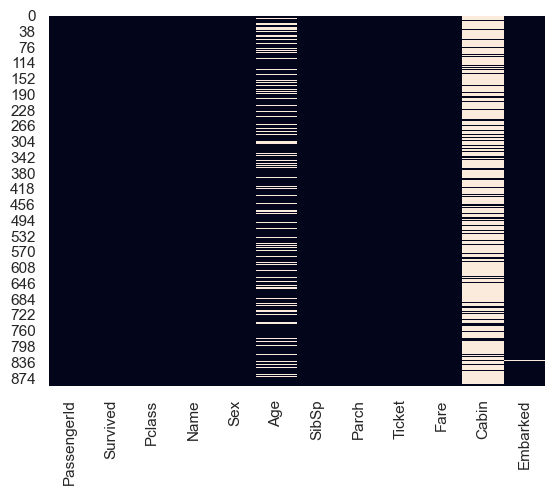

In [51]:
# Graph of number of nulls in each column.
sns.heatmap(df.isnull(), cbar=False) 

In [89]:
# Creating df1 without 'Cabin' column because almost 80% of it is null.
# Keeping the original df just in case it can be used in the future.
df1 = df.drop('Cabin',axis=1)
df1.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [53]:
# What are the different ports?
df1['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [54]:
# Assigning a numerical value to Sex.
df1['Sex'] = df1['Sex'].replace({'male':0,'female':1})
df1['Sex'] = df1['Sex'].astype(int)

# As nan is set as 0, this columns is not going to have any null value.
df1['Embarked'] = df1['Embarked'].replace({np.nan:0, 'S':1, 'C':2, 'Q':3})
df1['Embarked'] = df1['Embarked'].astype(int)

# Checking the changes.
df1.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked         int32
dtype: object

In [55]:
# Quick look at df1.
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,1


In [56]:
df1.dtypes 

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked         int32
dtype: object

In [57]:
# Checking back to nulls in the new df1.
df1nullPercentage = (df1.isnull().sum() / df1.shape[0]) * 100
print (df1nullPercentage)

PassengerId     0.00000
Survived        0.00000
Pclass          0.00000
Name            0.00000
Sex             0.00000
Age            19.86532
SibSp           0.00000
Parch           0.00000
Ticket          0.00000
Fare            0.00000
Embarked        0.00000
dtype: float64


In [58]:
# Filling null data in 'Age' with mean.
df1['Age'].fillna(df1['Age'].mean(),inplace=True)

# Last check.
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<Axes: >

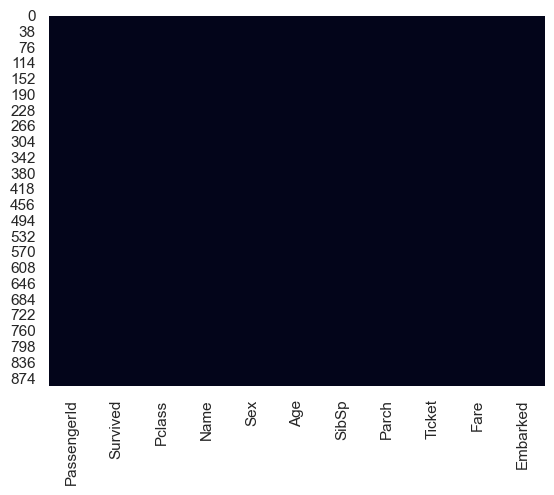

In [59]:
# Checking df1 null with a graphic before treating the df1.
sns.heatmap(df1.isnull(), cbar=False) 

## <center>What can each column tell by itself?<center>

#### PassengerId

In [60]:
# Number of passengers registered.
totalPass = df1['PassengerId'].max()
print (f'The total number of passengers was {totalPass} people')

The total number of passengers was 891 people


#### Survived

In [61]:
# Survivors
survived = df1['Survived'].sum()
died = totalPass-survived
print(f'{survived} passengers survived, and {died} did not')

survivedPercent = (survived / totalPass*100)
diedPercent = (died/totalPass*100)

print (f'Meaning that {survivedPercent:.2f}% survived, while {diedPercent:.2f} % could not.')

342 passengers survived, and 549 did not
Meaning that 38.38% survived, while 61.62 % could not.


##### Total of survivors 

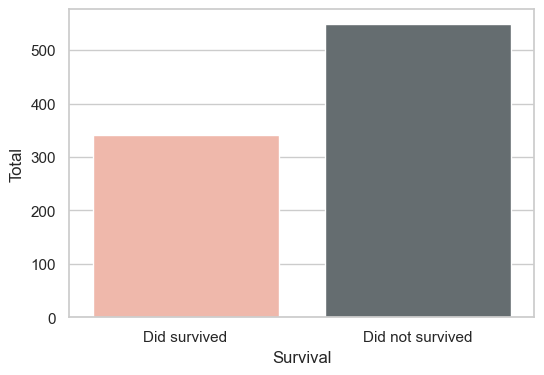

In [62]:
# The same information presented graphically.

Survivals = {'Survival':['Did survived','Did not survived'], 'Total': [survived,died]}

Survivals_df = pd.DataFrame(Survivals)

colours = ['#fab1a0','#636e72']

plt.figure(figsize=(6,4))
sns.barplot (x='Survival',y='Total', data = Survivals_df,palette = colours, hue='Survival', legend=False)
plt.show()

#### The 'Name' column did not tell any fun fact by itself *(But... is there Jack Dawson and Rose DeWitt?)*

#### Sex

In [63]:
# Total of men and women. 
women = df1['Sex'].sum()
men = totalPass - women
print(f'There were {men} men and {women} women.')

menPercent = (men / totalPass * 100)
womenPercent = (women / totalPass * 100)

print(f'Meaning that {menPercent:.2f}% were men, while {womenPercent:.2f}% were women.')


There were 577 men and 314 women.
Meaning that 64.76% were men, while 35.24% were women.


##### Total mujeres y hombres

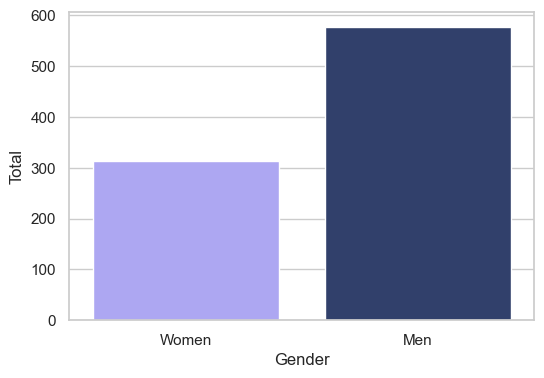

In [64]:
# The same information presented graphically.

people = {'Gender':['Women','Men'], 'Total': [women,men]}

people_df = pd.DataFrame(people)

colours =['#a29bfe','#273c75']

plt.figure(figsize=(6,4))
sns.barplot (x='Gender',y='Total', data = people_df,palette = colours, hue='Gender', legend=False)
plt.show()

#### Age

In [65]:
# The following information can be obtained:

oldest = df1['Age'].max()
mean = df1['Age'].mean()
youngest = df1['Age'].min()

print (f'The youngest passenger was {youngest} years old, the oldest was {oldest} years old, and on average, the passengers were {mean:.2f} years old.')

The youngest passenger was 0.42 years old, the oldest was 80.0 years old, and on average, the passengers were 29.70 years old.


##### Number of people by age


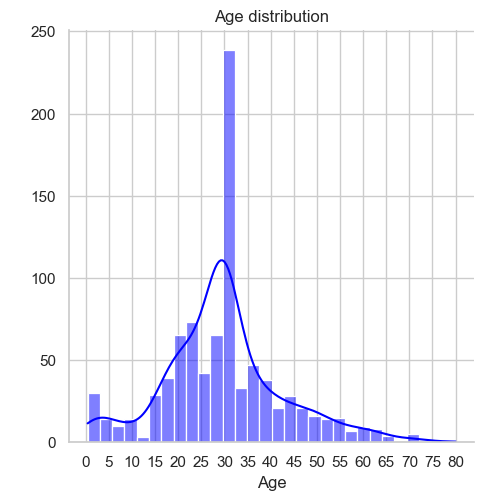

In [66]:
# sns.distplot(df1['Age']) deprecated function

sns.set(style='whitegrid')
sns.displot(df1['Age'],kde=True, color='blue')
plt.xlabel('Age')
plt.xticks(range(0,85,5))
plt.ylabel(' ')
plt.title('Age distribution')
plt.show()

#### SibsSp

In [67]:
# Siblings/Spouse column

rangeSibSp = sorted(df1['SibSp'].unique())
rangeSibSp_str = ', '.join(map(str, rangeSibSp))
print(f'The passengers did mark in this column the following numbers {rangeSibSp_str}')
sibnspose = df1['SibSp'].sum()
print(f'Adding altogether there were {sibnspose}')

The passengers did mark in this column the following numbers 0, 1, 2, 3, 4, 5, 8
Adding altogether there were 466


#### Parch

In [68]:
# Parents/children column

rangeParch = sorted(df1['Parch'].unique())
rangeParch_str = ', '.join(map(str, rangeParch))
print(f'The passengers did mark in this column the following numbers {rangeParch_str}')

Parentsnchild = df1['Parch'].sum()
print (f'Adding altogether there were {Parentsnchild}')

The passengers did mark in this column the following numbers 0, 1, 2, 3, 4, 5, 6
Adding altogether there were 340


#### The 'Ticket' column did not tell any information by it self, so far...  *(Which ticket did DiCaprio win while playing poker?)*

#### Fare

In [69]:
# The following information can be obtained:

expensive = df1['Fare'].max()
meanFare = df1['Fare'].mean()
cheap = df1['Fare'].min()
commonFare = df1['Fare'].mode()[0]

print (f'The cheapest ticket price was £{cheap:.2f}, and the most expensive was £{expensive:.2f}') 

print (f'The most common price was £{commonFare:.2f}, and the average price was £{meanFare:.2f}.')

The cheapest ticket price was £0.00, and the most expensive was £512.33
The most common price was £8.05, and the average price was £32.20.


##### Price distribution

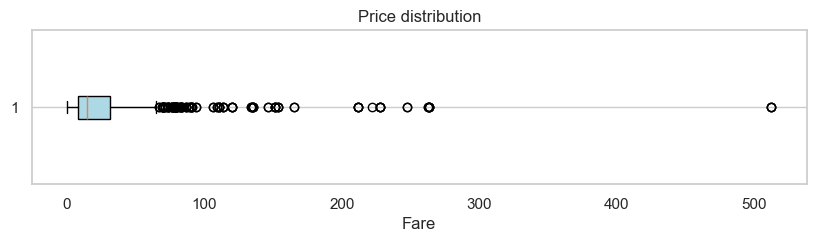

In [70]:
# Kind of the same information presented graphically.

fares = df1['Fare']

plt.figure(figsize=(10,2))
plt.boxplot(fares, vert=False, patch_artist=True, boxprops={'facecolor': 'lightblue'})
plt.xlabel('Fare')
plt.title('Price distribution')
plt.grid(axis='x')
plt.show()

#### Embarked

In [71]:
# Passengers from each port.
newIndex = {
    0 : 'N.A',
    1 : 'Southampton',
    2 : 'Cherbourg',
    3 : 'Queenstown'
}

dfEmbarked = df1['Embarked'].map(newIndex).value_counts()
dfEmbarked

Embarked
Southampton    644
Cherbourg      168
Queenstown      77
N.A              2
Name: count, dtype: int64

##### Total passenger from each port

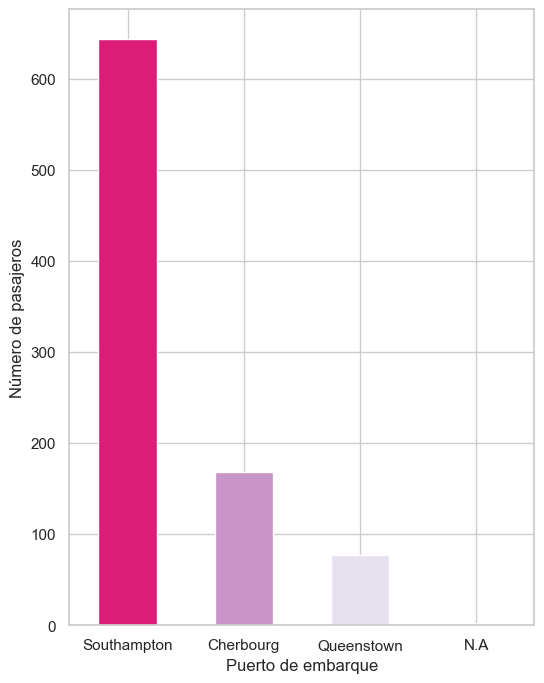

In [72]:
colors = {'Southampton': '#dd1c77', 'Cherbourg': '#c994c7', 'Queenstown': '#e7e1ef','N.A':'#ffffff'}

bar_colors = [colors[port] for port in dfEmbarked.index]

plt.figure(figsize=(6,8))

dfEmbarked.plot(kind='bar', color=bar_colors)
plt.xlabel('Puerto de embarque')
plt.xticks(rotation=0)
plt.ylabel('Número de pasajeros')
plt.show()


## <center>Correlations between columns<center>

In [73]:
# New df to have only numeric values
df2 = df1.drop('Name',axis=1)
df2 = df2.drop('Ticket',axis=1)

<Axes: >

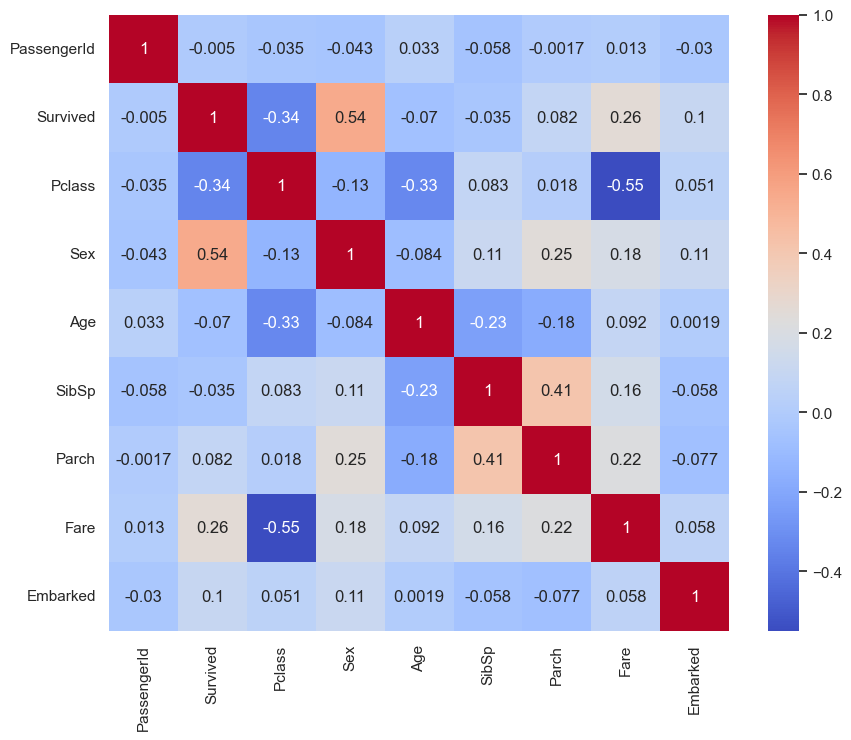

In [74]:
# Pearson correlation coefficient.
plt.figure(figsize=(10, 8))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm')

In [75]:
# Quick check at df2.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int32  
dtypes: float64(2), int32(2), int64(5)
memory usage: 55.8 KB


## <center> The following graphs attempt to represent the highest and lowest correlation between pairs of columns<center> 
* **Survived - Pclass** > *Correlation*: -0.34

In [90]:
fig = go.Figure()

grouped_data = df2.groupby(['Pclass', 'Survived']).size().unstack(fill_value=0)

colors = ['#00b894', '#00cec9', '#0984e3'] 

for i, pclass in enumerate(grouped_data.index):
    fig.add_trace(go.Bar(
        x=['Did not survived', 'Survived'],
        y=grouped_data.loc[pclass],
        name=f'Pclass {pclass}',
        marker_color=colors[i] 
    ))

fig.update_layout(
    title="Survivals by Class",
    barmode='group',
    width=500,
    height=500,
)

fig.show()


* **Survived - Sex** > *Correlation*: 0.54

In [77]:
df2_custom_labels = df2.copy()
df2_custom_labels['Sex'] = df2_custom_labels['Sex'].replace({0: 'Men', 1: 'Women'})

fig = go.Figure()

grouped_data = df2_custom_labels.groupby(['Sex', 'Survived']).size().unstack(fill_value=0)

marker_colors = ['#273c75','#a29bfe']

for sex, color in zip(grouped_data.index, marker_colors):
    fig.add_trace(go.Bar(x=['Did not survived','Survived'], y=grouped_data.loc[sex], name=f'Sex {sex}', marker_color=color))

fig.update_layout(
    title="Survivals by Sex/Gender",
    barmode='group',
    width=500,
    height=500,
)

fig.show()


* **Pclass - Fare** > *Correlation* : -0.55

In [78]:
color_mapping = {1: '#00b894', 2: '#00cec9', 3: '#0984e3'}


fig = px.scatter(df2, x='Pclass', y='Fare', title="Fare by class")

fig.update_traces(marker=dict(color=df2['Pclass'].map(color_mapping)))

fig.update_xaxes(tickvals=[1, 2, 3], ticktext=['First', 'Second', 'Third'])

fig.update_layout(
    height=400,
    width=400,
)

fig.show()

* **Pclass - SibSp** > *Correlation*: 0.83

In [79]:
color_mapping = {1: '#00b894', 2: '#00cec9', 3: '#0984e3'}

fig = px.scatter(df2, x='Pclass', y='SibSp', title='Class and Siblings/Spouse correlation')

fig.update_traces(marker=dict(color=df2['Pclass'].map(color_mapping)))

fig.update_xaxes(tickvals=[1, 2, 3], ticktext=['First', 'Second', 'Third'])

fig.update_layout(
    height=400,
    width=400,
)


fig.show()

* **Sex - Pclass** > *Correlation*: -0.13

In [80]:
fig = go.Figure()

ct = pd.crosstab(df2['Sex'], df2['Pclass'])
ct.index = ['Men', 'Women'] 


colors = ['#00b894', '#00cec9', '#0984e3'] 

for i, pclass in enumerate(ct.columns):
    fig.add_trace(go.Bar(x=ct.index, y=ct[pclass], name=f'Pclass {pclass}', marker_color=colors[i]))

fig.update_layout(barmode='stack', title="Sex/Gender and class correlation")
fig.update_layout(
    height=400,
    width=400
)
fig.show()

* **Age - Pclass** > *Correlation* -0.33

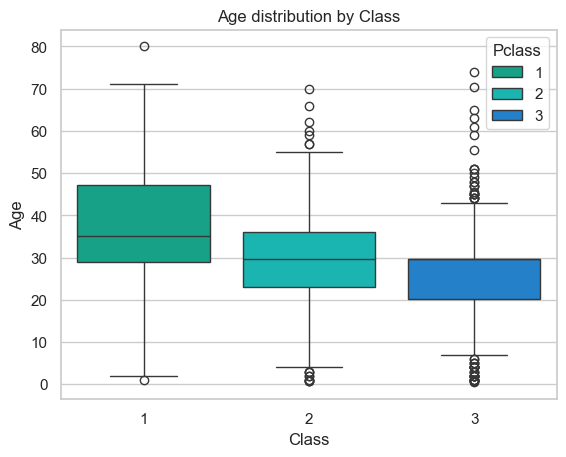

In [81]:
custom_palette = ['#00b894', '#00cec9', '#0984e3']  

sns.boxplot(x='Pclass', y='Age', data=df2, palette=custom_palette, hue='Pclass', dodge=False)
sns.set_style("whitegrid")
plt.xlabel('Class')
plt.ylabel('Age')
plt.title('Age distribution by Class')

plt.show()

* **Age - Fare** > *Correlation*: 0.092

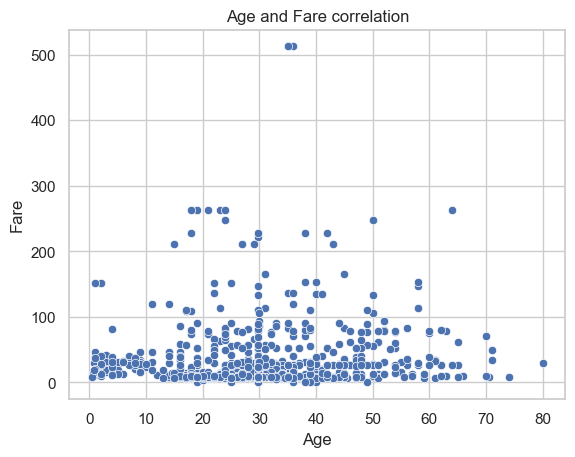

In [82]:
sns.scatterplot(data=df2, x='Age', y='Fare')
plt.title('Age and Fare correlation')
plt.show()

* **SibSp - Parch** > *Correlation* : 0.41

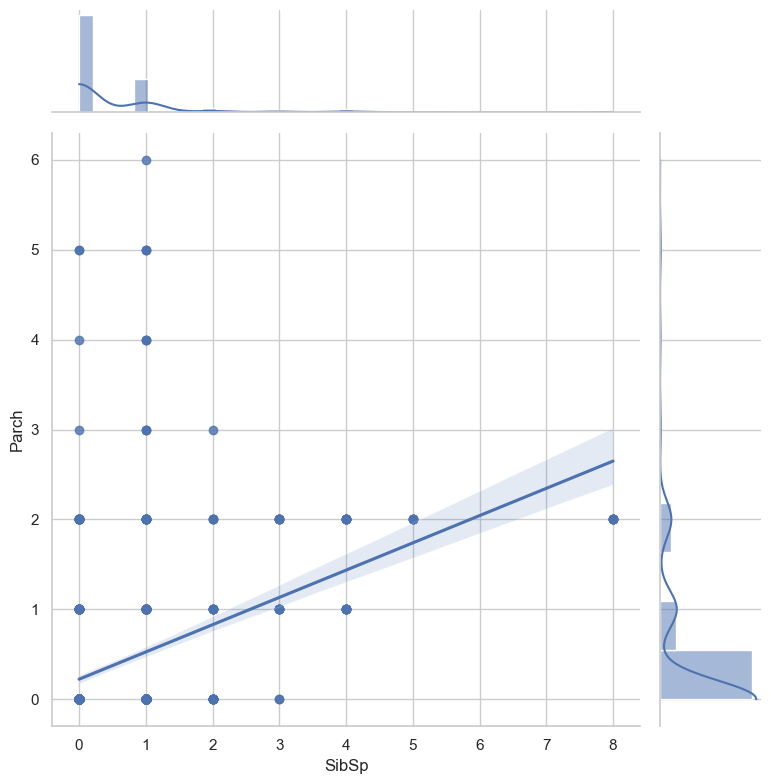

In [83]:
sns.jointplot(x='SibSp', y='Parch', data=df2, kind='reg', height=8)
plt.show()

* **SibSp - Age** > *Correlation*: -0.23

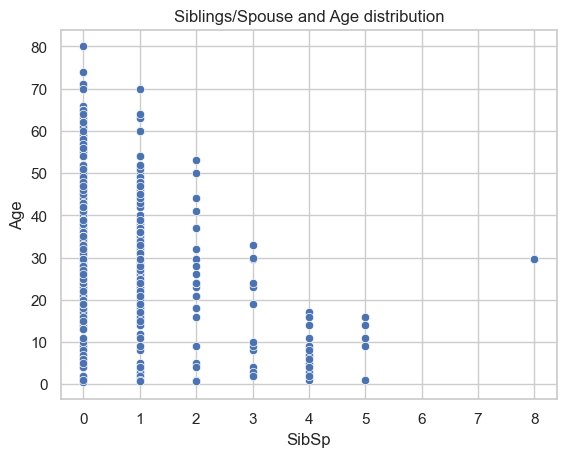

In [84]:

sns.scatterplot(data=df2, x='SibSp', y='Age')
plt.title('Siblings/Spouse and Age distribution')
plt.show()

* **Parch - Age** > *Correlation*: -0.18

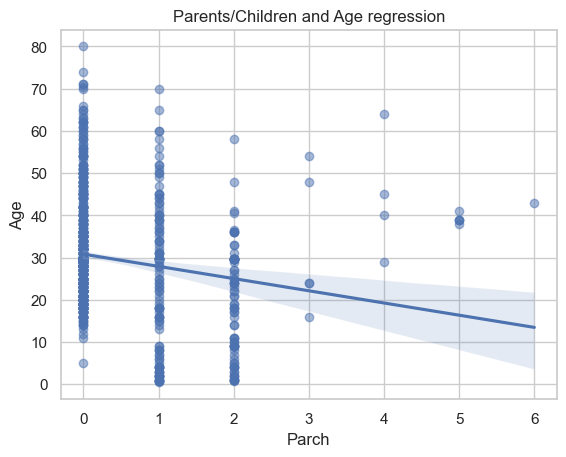

In [85]:
sns.regplot(data=df2, x='Parch', y='Age', scatter_kws={'alpha': 0.5}, color='b')
plt.title('Parents/Children and Age regression')
plt.show()

* **Fare - Survived** > *Correlation* 0.26

In [86]:
df2_custom_labels = df2.copy()
df2_custom_labels['Survived'] = df2_custom_labels['Survived'].replace({0: 'Not Survived', 1: 'Survived'})

fig = px.violin(df2_custom_labels, 
                x='Survived', 
                y='Fare', 
                box=True, 
                points="all", 
                title='Fare and survival distribution')
fig.update_layout(
    height=400,
    width=800
)
fig.show()

* **Embarked - Sex** > *Correlation* 0.11

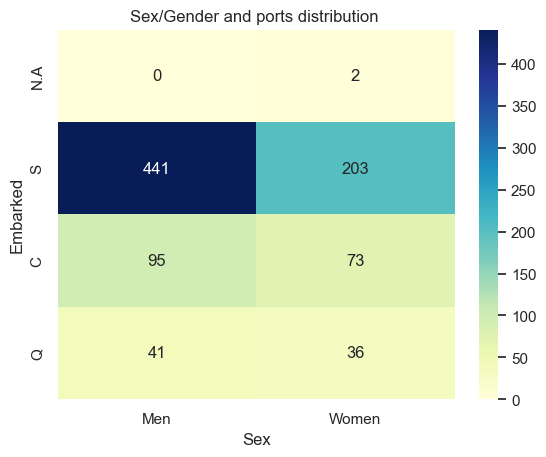

In [87]:
contingency_table = pd.crosstab(df2['Embarked'], df2['Sex'])

contingency_table = pd.crosstab(df2['Embarked'], df2['Sex'])

x_labels = ['Men', 'Women']
y_labels = ['N.A','S', 'C', 'Q']

sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu', xticklabels=x_labels, yticklabels=y_labels)
plt.xlabel('Sex')
plt.ylabel('Embarked')
plt.title('Sex/Gender and ports distribution ')
plt.show()

* **Embarked - Parch** > *Correlation*: -0.077

In [88]:
grouped_data = df2.groupby('Embarked')['Parch'].sum().reset_index()

fig = px.bar(grouped_data, x='Embarked', y='Parch', title="Parents/Children and ports distribution")
fig.update_xaxes(tickvals=[1,2,3,0], ticktext=['Southampton','Cherbourg','Queenstown','N.A'])

fig.update_xaxes(title="Embarked Port")
fig.update_yaxes(title="Total Parch")
fig.update_layout(width=600, height=400)
fig.show()
